# Introduction - Kickstarter Success



### Objective: To analyze past Kickstarters Projects Strategy

- Identifying the most impactful country to Kickstarter Projects success rate
- What category of project is had proven to be successful
- Find any variables that will impact success for creators as they are setting up their projects


## Files Description

Data File: ks-projects201801.csv

Obtained from: https://www.kaggle.com/kemical/kickstarter-projects?select=ks-projects-201801.csv

### Importing Libraries

In [1]:
#Loading libraries to start analysis and plotting of dataset

import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

### Importing Dataset

In [2]:
kickstarter2018 = pd.read_csv('ks-projects-201801.csv')

In [3]:
print(kickstarter2018.columns) #Gettting info on columns in the dataset
kickstarter2018.head(5) #Printing first 5 lines of the dataset to get more familiar data in columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


# Cleansing Data

### State/Status

In [4]:
#Printing numbers of the different states/statuses of the overrall projects
print(kickstarter2018['state'].value_counts()) 

#Printing percentage of the dataset
print(kickstarter2018['state'].value_counts()/len(kickstarter2018) * 100)

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64
failed        52.215306
successful    35.376234
canceled      10.241086
undefined      0.940683
live           0.739184
suspended      0.487507
Name: state, dtype: float64


In [5]:
#Creating condition for projects that are in 'undefined'
undefined_status = kickstarter2018['state'] == 'undefined'

#Dropping the "undefined" from dataset as that dataset
kickstarter2018.drop(kickstarter2018.index[undefined_status], inplace=True)
print(kickstarter2018['state'].value_counts())

#Printing percentage of the dataset
print(kickstarter2018['state'].value_counts()/len(kickstarter2018) * 100)

failed        197719
successful    133956
canceled       38779
live            2799
suspended       1846
Name: state, dtype: int64
failed        52.711151
successful    35.712172
canceled      10.338337
live           0.746203
suspended      0.492137
Name: state, dtype: float64


### Launch Year

In [6]:
kickstarter2018.groupby([(pd.to_datetime(kickstarter2018.launched).dt.year)]).size()

launched
1970        7
2009     1329
2010    10519
2011    26237
2012    41163
2013    44849
2014    66994
2015    74920
2016    56757
2017    52200
2018      124
dtype: int64

In [7]:
#Creating condition for project launched dated with year of 1970
offdate = pd.to_datetime(kickstarter2018.launched).dt.year == 1970


#Dropping the 1970 data from dataset as that data in that status are actually 
kickstarter2018.drop(kickstarter2018.index[offdate], inplace=True)
print(kickstarter2018['launched'].groupby([pd.to_datetime(kickstarter2018.launched).dt.year]).size())

launched
2009     1329
2010    10519
2011    26237
2012    41163
2013    44849
2014    66994
2015    74920
2016    56757
2017    52200
2018      124
Name: launched, dtype: int64


### Country

In [8]:
kickstarter2018.groupby(kickstarter2018.country).size()

country
AT         597
AU        7839
BE         617
CA       14756
CH         760
DE        4171
DK        1113
ES        2276
FR        2939
GB       33672
HK         618
IE         811
IT        2878
JP          40
LU          62
MX        1752
N,0"       235
NL        2868
NO         708
NZ        1447
SE        1757
SG         555
US      292621
dtype: int64

In [9]:
#Creating condition for projects that are in 'undefined'
unknown_country = kickstarter2018['country'] == 'N,0"'

#Dropping the "undefined" from dataset as that dataset
kickstarter2018.drop(kickstarter2018.index[unknown_country], inplace=True)
print(kickstarter2018['country'].groupby(kickstarter2018.country).size())

country
AT       597
AU      7839
BE       617
CA     14756
CH       760
DE      4171
DK      1113
ES      2276
FR      2939
GB     33672
HK       618
IE       811
IT      2878
JP        40
LU        62
MX      1752
NL      2868
NO       708
NZ      1447
SE      1757
SG       555
US    292621
Name: country, dtype: int64


### Column Cleansing

In [10]:
kickstarter2018.drop(['ID','name','currency','goal','usd pledged' ,'pledged'],axis = 1, inplace=True)

In [11]:
kickstarter2018['launched'] = pd.to_datetime(kickstarter2018.launched)

## Cleaning Justifcation:

- Dropping Projects in `state` with value of "undefined" as this is not a status that is used on Kickstarter Platform and accounts for less than 1% of the dataset.
- Removing  7 data rows with 'launched' date in the year of 1970 as Kickstarter was founded in 2009. Small data points from that far back will disrupt analysis when looking at the data over time.
- No `country` named N,0" so that data is also being removed.
- `ID`:all the ID fields are unique but will not be untilized in this analysis
- `name`: same as ID where this is very unique but will not be used in this analysis for success and failure
- `currency`: for easy of analysis we will be standardizing all funds to USD
- `goal`: contains funded needed in local currency, however `usd_goal_real` provides goals converted into USD
- `usd pledged`: contains a lot of missing values from Kickstarter and `usd_pledged_real` provided more complete data
- `pledged`: like `goal` this column is in local currency and USD will be used
-`launched`: taking off the time part to match deadline

 
 

Deadline Duration

In [12]:
import datetime
kickstarter2018['launched'] = pd.to_datetime(kickstarter2018['launched']).dt.date
kickstarter2018['deadline'] = pd.to_datetime(kickstarter2018['deadline']).dt.date

kickstarter2018['deadline_duration'] = (kickstarter2018['deadline'] - kickstarter2018['launched']).dt.days

Percentage Goal Funds Achieved

In [13]:
kickstarter2018['percent_achieved'] = (kickstarter2018['usd_pledged_real']/kickstarter2018['usd_goal_real']) * 100

## Overall

Project Status Percentages: 
failed        52.72
successful    35.71
canceled      10.34
live           0.75
suspended      0.49
Name: state, dtype: float64


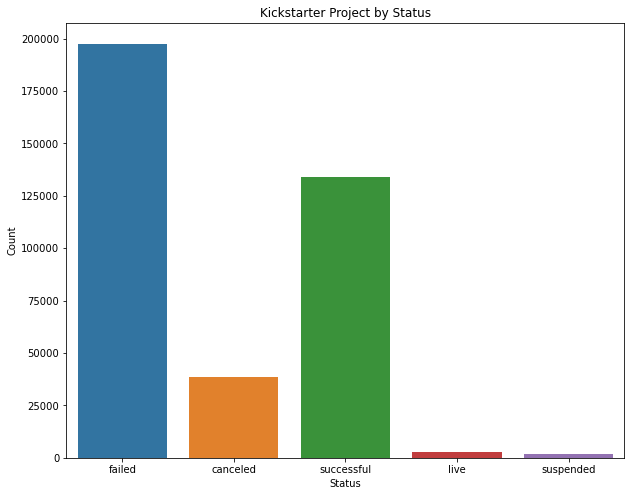

In [14]:
#Find percentage for state/status
totalstatus = round((kickstarter2018['state'].value_counts()) / kickstarter2018.shape[0] * 100,2)
print('Project Status Percentages: ')
print(totalstatus)

plt.figure(figsize=(10,8))
projectstate_plot = sns.countplot(x='state', data=kickstarter2018)
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Kickstarter Project by Status')
plt.show()


Project Country Percentages: 
US    78.062034
GB     8.982625
CA     3.936434
AU     2.091197
DE     1.112691
FR     0.784032
IT     0.767759
NL     0.765092
ES     0.607165
SE     0.468712
Name: country, dtype: float64


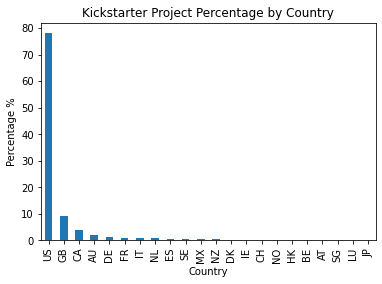

In [15]:
#percentage of projects per country
totalcountry = (kickstarter2018['country'].value_counts()) / kickstarter2018.shape[0] * 100

#displaying top 10
print('Project Country Percentages: ')
print(totalcountry.head(10))

#plotting percentages by country
totalcountry.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Percentage %')
plt.title('Kickstarter Project Percentage by Country')
plt.show()

Project Category Percentages: 
Film & Video    16.725044
Music           13.212772
Publishing      10.504806
Games            9.397183
Technology       8.686512
Design           8.020659
Art              7.510064
Food             6.562236
Fashion          6.085521
Theater          2.910710
Comics           2.886167
Photography      2.875230
Crafts           2.349963
Journalism       1.268217
Dance            1.004917
Name: main_category, dtype: float64


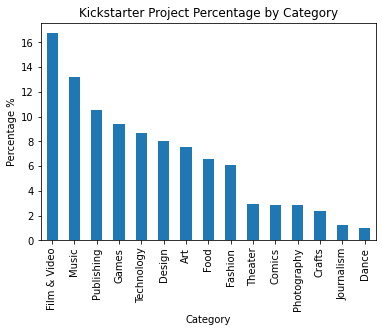

In [16]:
#calculating percentage per main category
totalcategory = (kickstarter2018['main_category'].value_counts()) / kickstarter2018.shape[0] * 100

#displaying all category percentages
print('Project Category Percentages: ')
print(totalcategory)

#plotting percent for each category
totalcategory.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Percentage %')
plt.title('Overall Coun Percentage')
plt.title('Kickstarter Project Percentage by Category')

plt.show()


### US

In [17]:
#Getting data from only US
overall_us = kickstarter2018[(kickstarter2018['country'] =='US')]

#Percentages by State/Status
overall_us = (overall_us['state'].value_counts()) / overall_us.shape[0] * 100
print(overall_us)


failed        51.965170
successful    37.351728
canceled       9.672922
live           0.594626
suspended      0.415555
Name: state, dtype: float64


In [18]:
#Creating new dateframes for different states
ks_success = pd.DataFrame(kickstarter2018[kickstarter2018['state'] == 'successful'])

#Contains all but 'live' and 'successful' as this other statuses still represent project not being funded
ks_fail = pd.DataFrame(kickstarter2018[kickstarter2018['state'] != 'successful']) 
ks_fail = pd.DataFrame(ks_fail[ks_fail['state'] != 'live'])

In [19]:
#Created dataframes US vs all other countries since US makes up so much of the data
us_success = ks_success[ks_success['country'] == 'US']
us_fails = ks_fail[ks_fail['country'] == 'US']

<AxesSubplot:xlabel='launched'>

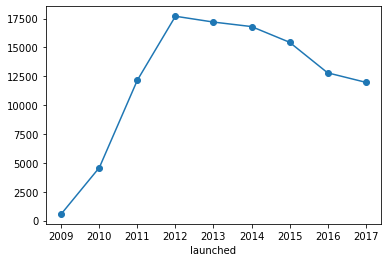

In [20]:
#Plotting Successful projects overtime
us_success.groupby([(pd.to_datetime(us_success.launched).dt.year)]).size().plot(kind='line', marker='o')

## Insight:

Since the US market makes up approximately 80% of projects on Kickstarter nregardless of project status there is not surprise that the status percentages closely match the over percentages. 

But in the US, a larger amount of project were succesfully funded from 2009 to 2011 as creators were looking to outside, unconvential ways to fund their projects as convential funding was not available from the US Economy  crash in 2008/2009.

Avg Overrall Project Deadline Duration: 
32.16
Avg Successful US Project Deadline Duration: 
count    109299.000000
mean         32.392090
std          12.033238
min           1.000000
25%          30.000000
50%          30.000000
75%          35.000000
max          92.000000
Name: deadline_duration, dtype: float64


Text(0.5, 1.0, 'Histogram of Successful Deadline Durantion in US')

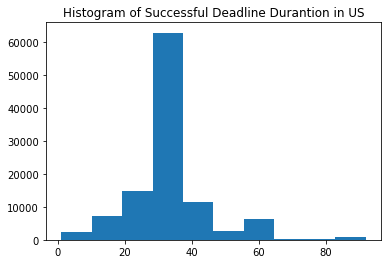

In [21]:
#overrall deadline duration
print("Avg Overrall Project Deadline Duration: ")
print(round(ks_success['deadline_duration'].mean(),2))

#print of successful deadline duration summary
print("Avg Successful US Project Deadline Duration: ")
print(us_success['deadline_duration'].describe())

#Histogram for successful deadline duration
plt.hist(us_success.deadline_duration)
plt.title('Histogram of Successful Deadline Durantion in US')



### Insight:


Unpopular to the standard opinion, more is not always better as the majority of project creators only needing bewteen 30-35 days to successful fund their project. Project creator are honing in on the sense of urgency for not only themselves to produce their dream but to give a sense of passion to share their dream project with backers.

## US Categories

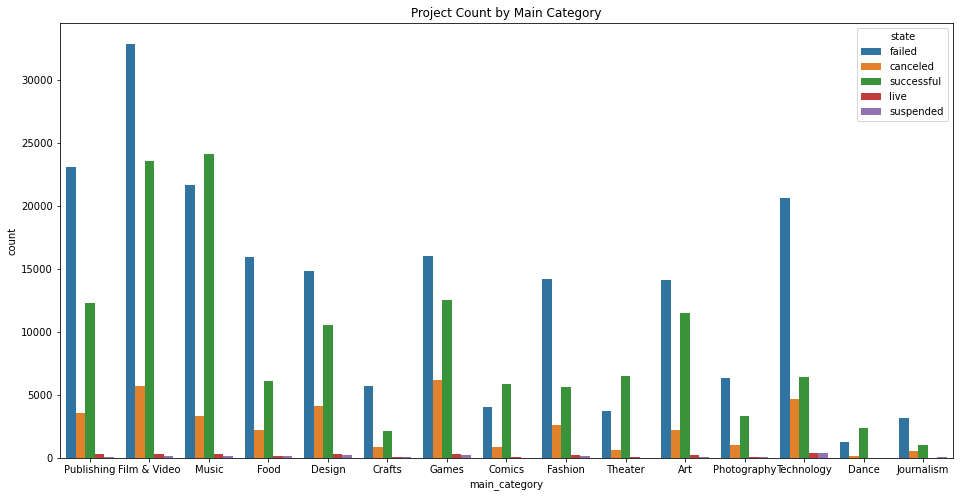

In [22]:
#Overrall projects by category
plt.figure(figsize=(16,8))

sns.countplot(x='main_category', data=kickstarter2018, hue='state')
plt.title('Project Count by Main Category')
plt.show()



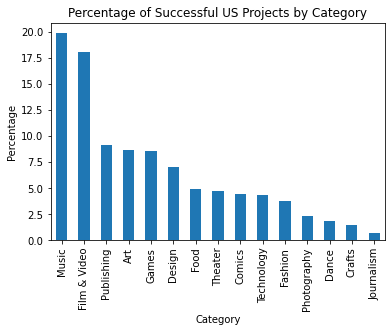

In [23]:
#Percentage of main categories for US Successful projects
us_cat = (us_success['main_category'].value_counts()/us_success.shape[0]) * 100

#plotting
us_cat = us_cat.plot(kind='bar', title = 'Percentage of Successful US Projects by Category')
us_cat = plt.xlabel('Category')
us_cat = plt.ylabel('Percentage')
plt.show()
 


### Top 3 Categories

### Music

In [24]:
#Looking at US Success projects in Music category
music_us = us_success.loc[us_success['main_category'] == 'Music']

#Total
print('Total Projects: ')
print(music_us.shape[0])

#Providing Ave in each variable
print('Averavges US Successful Music Projects: ')
music_ave = music_us[['backers', 'usd_pledged_real', 'usd_goal_real', 'deadline_duration', 'percent_achieved']].mean()

print(music_ave)

Total Projects: 
21718
Averavges US Successful Music Projects: 
backers               103.885349
usd_pledged_real     7481.140029
usd_goal_real        5840.722933
deadline_duration      33.907726
percent_achieved     1784.123875
dtype: float64


### Film & Video

In [25]:
#Looking at US Succes projects in Film & Video category
filmvid_us = us_success.loc[us_success['main_category'] == 'Film & Video']

#Total
print('Total Projects: ')
print(filmvid_us.shape[0])

#Providing Ave in each variable
print('Averavges US Successful Film & Video Projects: ')
filmvid_ave = filmvid_us[['backers', 'usd_pledged_real', 'usd_goal_real', 'deadline_duration', 'percent_achieved']].mean()

print(filmvid_ave)


Total Projects: 
19782
Averavges US Successful Film & Video Projects: 
backers                160.312102
usd_pledged_real     14865.630768
usd_goal_real        11871.892956
deadline_duration       32.737337
percent_achieved       420.043862
dtype: float64


### Publishing

In [26]:
#Looking at US Succes projects in Film & Video category
pub_us = us_success.loc[us_success['main_category'] == 'Publishing']

#Total
print('Total Projects: ')
print(pub_us.shape[0])

#Providing Ave in each variable
print('Averavges US Successful Publishing Projects: ')
pub_ave = pub_us[['backers', 'usd_pledged_real', 'usd_goal_real', 'deadline_duration', 'percent_achieved']].mean()

print(pub_ave)


Total Projects: 
9965
Averavges US Successful Publishing Projects: 
backers               157.395785
usd_pledged_real     9333.075867
usd_goal_real        5804.175093
deadline_duration      32.133869
percent_achieved      606.665065
dtype: float64


### Insight:

The top successful categories of projects for the US, Music, Film & Video, and Publishing, all show a pattern of projects being able to raise more funds than the intial goal the creator setup. The top categories for the US are industries in which distribution of the servce of good is more easily distruted. This offers more flexibility to the the creator to use more funds for marketing of the project and production of the service/good without worrying about the cost associated with packaging and shipping.

## Learning from Fails

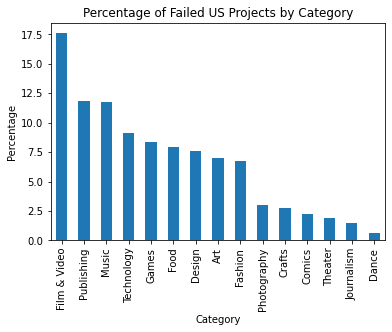

In [27]:
#Percentage of main categories for US failed projects
us_fcat = (us_fails['main_category'].value_counts()/us_fails.shape[0]) * 100

#plotting
us_fcat = us_fcat.plot(kind='bar', title = 'Percentage of Failed US Projects by Category')
us_fcat = plt.xlabel('Category')
us_fcat = plt.ylabel('Percentage')
plt.show()

<h3> <span style="color:red">Film & Video</span> </h3>

In [28]:
#Looking at US Failed projects in Film & Video category
ffilmvid_us = us_fails.loc[us_fails['main_category'] == 'Film & Video']

#Total
print('Total Projects: ')
print(ffilmvid_us.shape[0])

#Providing Ave in each variable
print('Averavges US Failed Film & Video Projects: ')
ffilmvid_ave = ffilmvid_us[['backers', 'usd_pledged_real', 'usd_goal_real', 'deadline_duration', 'percent_achieved']].mean()

print(ffilmvid_ave)


Total Projects: 
31926
Averavges US Failed Film & Video Projects: 
backers                  15.796874
usd_pledged_real       1610.539758
usd_goal_real        120060.215067
deadline_duration        37.653041
percent_achieved         19.146874
dtype: float64


<h3> <span style="color:red">Publishing</span> </h3>

In [29]:
#Looking at US Succes projects in Film & Video category
fpub_us = us_fails.loc[us_fails['main_category'] == 'Publishing']

#Total
print('Total Projects: ')
print(fpub_us.shape[0])

#Providing Ave in each variable
print('Averavges US Successful Publishing Projects: ')
fpub_ave = fpub_us[['backers', 'usd_pledged_real', 'usd_goal_real', 'deadline_duration', 'percent_achieved']].mean()

print(fpub_ave)


Total Projects: 
21563
Averavges US Successful Publishing Projects: 
backers                  9.691369
usd_pledged_real       613.855512
usd_goal_real        36541.601315
deadline_duration       35.052915
percent_achieved         8.643928
dtype: float64


<h3> <span style="color:red">Music</span> </h3>

In [30]:
#Looking at US failure projects in Music category
fmusic_us = us_fails.loc[us_fails['main_category'] == 'Music']

#Total
print('Total Projects: ')
print(fmusic_us.shape[0])

#Providing Ave in each variable
print('Averavges US Successful Music Projects: ')
fmusic_ave = fmusic_us[['backers', 'usd_pledged_real', 'usd_goal_real', 'deadline_duration', 'percent_achieved']].mean()

print(fmusic_ave)

Total Projects: 
21325
Averavges US Successful Music Projects: 
backers                  9.304103
usd_pledged_real       634.399775
usd_goal_real        25774.578514
deadline_duration       37.339836
percent_achieved         9.482147
dtype: float64


In [31]:
music_srate = music_us.shape[0]/(fmusic_us.shape[0] + music_us.shape[0])
music_frate = fmusic_us.shape[0]/(fmusic_us.shape[0] + music_us.shape[0])

print('Music Success Rate: ')
print(round(music_srate,3))
print('Music Failure Rate: ')
print(round(music_frate,3))


Music Success Rate: 
0.505
Music Failure Rate: 
0.495


In [32]:
filmvid_srate = filmvid_us.shape[0]/(ffilmvid_us.shape[0] + filmvid_us.shape[0])
filmvid_frate = ffilmvid_us.shape[0]/(ffilmvid_us.shape[0] + filmvid_us.shape[0])

print('Film & Video Success Rate: ')
print(round(filmvid_srate,3))
print('Film & Video Failure Rate: ')
print(round(filmvid_frate,3))


Film & Video Success Rate: 
0.383
Film & Video Failure Rate: 
0.617


In [33]:
pub_srate = pub_us.shape[0]/(fpub_us.shape[0] + pub_us.shape[0])
pub_frate = fpub_us.shape[0]/(fpub_us.shape[0] + pub_us.shape[0])


print('Publishing Success Rate: ')
print(round(pub_srate,3))
print('Publishing Failure Rate: ')
print(round(pub_frate,3))


Publishing Success Rate: 
0.316
Publishing Failure Rate: 
0.684


## Insight:

The top categories of projects for success are also the top categories for failure. We see that there is a low amount of average backers and percent of goal achieved due to some projects being cancelled or not funded at all. From these failures in the same catefories the see that out of the three, Music, Film & Video, and Publishing, Music has the best success rate.




## Correlation of all categories

<AxesSubplot:>

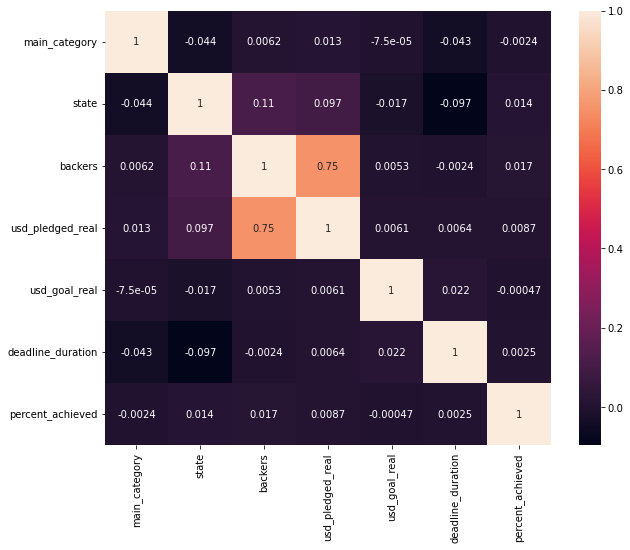

In [36]:
#Datafram for just overall
correlation = pd.DataFrame(kickstarter2018)

#Converting main category from categorical to numerical to run correlation
correlation['main_category'] = pd.factorize(correlation['main_category'])[0]
#Converting state from categorical to numerical to run correlation
correlation['state'] = pd.factorize(correlation['state'])[0]

#Heatmap for us correlation
us_corr_plot = us_corr.corr()
fig, ax = plt.subplots(figsize = (10,8))
sns.heatmap(us_corr_plot, annot=True)



## Concluding Insights:

Based on the analysis, we have found that Kickstarts were most impacted by the US market and saw a exponential growth in success rate after the resession but in recent years the amount of projects has been declining. It was also determined that in the Main Categories of projects that the Music, Film & Video, and Publishing are the most successful and the most failed projects in the US as they have have an easy distribution channel that reduces costs associated with shipping. 

Overrall, there did not apprear to be a single factor that contributes to the success of a project and can be supported with the correlation graph that was created. Many unquantifiable variables as well as data not provided are working together to contribute to the successful in addition to the ones that were analyzed. Some of these include: quality and design of a product/service, the backers' incentives for pledging, innovation of the product, marketing and conversion rate to obtain backers. With the additions of more details on projects a bigger classfication of project can be modeled to predict the success of projects and determine the success of live projects.
